## EU Energy Generation, Price, Consumption Modelling

electricity prices, electricity consumption (load) as well as wind and solar power generation and capacities

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Reading 15 min frequency dataset
url = 'https://data.open-power-system-data.org/time_series/2020-10-06/time_series_15min_singleindex.csv'
df = pd.read_csv(url)
display(df.head())

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,DE_load_actual_entsoe_transparency,...,HU_solar_generation_actual,HU_wind_onshore_generation_actual,LU_load_actual_entsoe_transparency,LU_load_forecast_entsoe_transparency,NL_load_actual_entsoe_transparency,NL_load_forecast_entsoe_transparency,NL_solar_generation_actual,NL_wind_generation_actual,NL_wind_offshore_generation_actual,NL_wind_onshore_generation_actual
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-31T23:15:00Z,2015-01-01T00:15:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-31T23:30:00Z,2015-01-01T00:30:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-31T23:45:00Z,2015-01-01T00:45:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df[['utc_timestamp',
    'DE_load_actual_entsoe_transparency', #Total load in Germany in MW as published on ENTSO-E Transparency Platform
    'DE_load_forecast_entsoe_transparency', #Day-ahead load forecast in Germany in MW as published on ENTSO-E Transparency Platform
    'DE_solar_capacity', # Electrical capacity of solar in Germany in MW
    'DE_solar_generation_actual', #Actual solar generation in Germany in MW
    'DE_solar_profile', #Share of solar capacity producing in Germany
    'DE_wind_capacity', # Electrical capacity of wind in Germany in MW
    'DE_wind_generation_actual', #Actual wind generation in Germany in MW
    'DE_wind_profile', # Share of wind capacity producing in Germany
    'DE_wind_offshore_capacity', #Electrical capacity of wind_offshore in Germany in MW
    'DE_wind_offshore_generation_actual', # Actual wind_offshore generation in Germany in MW
    'DE_wind_offshore_profile', #Share of wind_offshore capacity producing in Germany
    'DE_wind_onshore_capacity', #Electrical capacity of wind_onshore in Germany in MW
    'DE_wind_onshore_generation_actual', #Actual wind_onshore generation in Germany in MW
    'DE_wind_onshore_profile', #Share of wind_onshore capacity producing in Germany
    'DE_50hertz_load_actual_entsoe_transparency'#Total load in 50Hertz (control area) in MW as published on ENTSO-E Transparency Platform
    ]]

## Data Exploration

In [4]:
# Size of the data
df.shape
print(f'The total number of rows is {df.shape[0]} and the total number of columns is {df.shape[1]}')

The total number of rows is 201604 and the total number of columns is 16


In [5]:
# Variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201604 entries, 0 to 201603
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   utc_timestamp                               201604 non-null  object 
 1   DE_load_actual_entsoe_transparency          201598 non-null  float64
 2   DE_load_forecast_entsoe_transparency        201502 non-null  float64
 3   DE_solar_capacity                           175199 non-null  float64
 4   DE_solar_generation_actual                  201184 non-null  float64
 5   DE_solar_profile                            174783 non-null  float64
 6   DE_wind_capacity                            175199 non-null  float64
 7   DE_wind_generation_actual                   201300 non-null  float64
 8   DE_wind_profile                             174897 non-null  float64
 9   DE_wind_offshore_capacity                   175199 non-null  float64
 

In [6]:
# Change date variable as time variable
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201604 entries, 0 to 201603
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype              
---  ------                                      --------------   -----              
 0   utc_timestamp                               201604 non-null  datetime64[ns, UTC]
 1   DE_load_actual_entsoe_transparency          201598 non-null  float64            
 2   DE_load_forecast_entsoe_transparency        201502 non-null  float64            
 3   DE_solar_capacity                           175199 non-null  float64            
 4   DE_solar_generation_actual                  201184 non-null  float64            
 5   DE_solar_profile                            174783 non-null  float64            
 6   DE_wind_capacity                            175199 non-null  float64            
 7   DE_wind_generation_actual                   201300 non-null  float64            
 8   DE_wind_profile         

In [8]:
# Percentage of missing values per variable
df.isnull().sum() / df.shape[0] * 100

,0
utc_timestamp,0.000000
DE_load_actual_entsoe_transparency,0.002976
DE_load_forecast_entsoe_transparency,0.050594
DE_solar_capacity,13.097458
DE_solar_generation_actual,0.208329
DE_solar_profile,13.303803
DE_wind_capacity,13.097458
DE_wind_generation_actual,0.150791
DE_wind_profile,13.247257
DE_wind_offshore_capacity,13.097458


The highest % of missing data points is ~13% which is not a problem for the data analysis

In [9]:
# Detecting duplicates
df.duplicated().sum()

np.int64(0)

There are no duplicates in the dataset

In [10]:
df['year'] = df['utc_timestamp'].dt.year
df['month'] = df['utc_timestamp'].dt.month
df['day'] = df['utc_timestamp'].dt.day

missing_percentages = df.groupby(['year', 'month', 'day']).apply(lambda x: x.isnull().sum() / len(x) * 100)

/tmp/ipython-input-2563124349.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_percentages = df.groupby(['year', 'month', 'day']).apply(lambda x: x.isnull().sum() / len(x) * 100)


/tmp/ipython-input-1408889058.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_percentages = df.groupby(['year', 'month', 'day']).apply(lambda x: x.isnull().sum() / len(x) * 100)


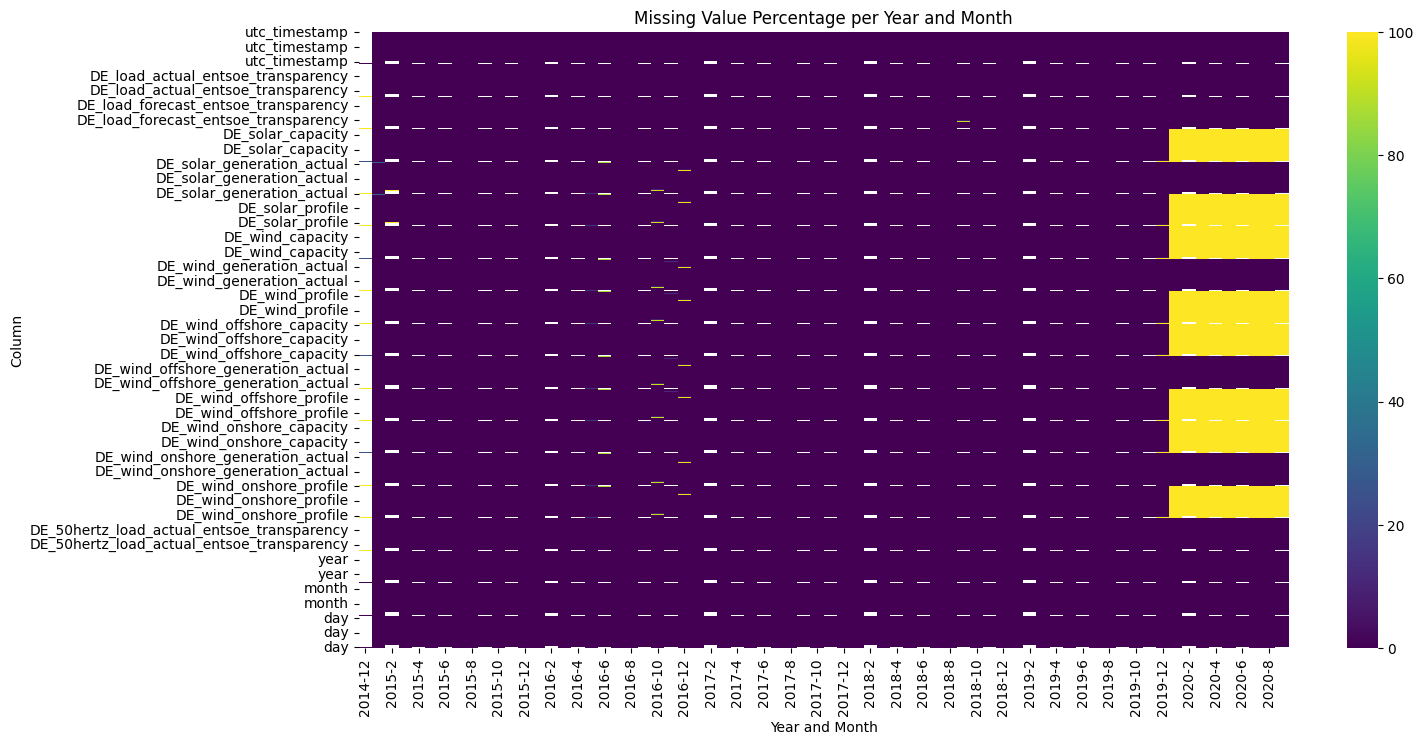

In [11]:
# Getting missing percentages
missing_percentages = df.groupby(['year', 'month', 'day']).apply(lambda x: x.isnull().sum() / len(x) * 100)

missing_percentages_ym = missing_percentages.unstack(level='day').droplevel('day', axis=1)

plt.figure(figsize=(15, 8))
sns.heatmap(missing_percentages_ym.T, cmap='viridis')
plt.title('Missing Value Percentage per Year and Month')
plt.xlabel('Year and Month')
plt.ylabel('Column')
plt.show()

A large chunk of missing values is between 2019 December- 2020 December for the following variables:

1. Solar Capacity
2. Solar Profile
3. Wind Capacity
4. Wind Profile
5. Wind OffShore Capacity
7. Wind OffShore Profile
8. Wind OnShore Capacity
9. Wind OnShore Profile

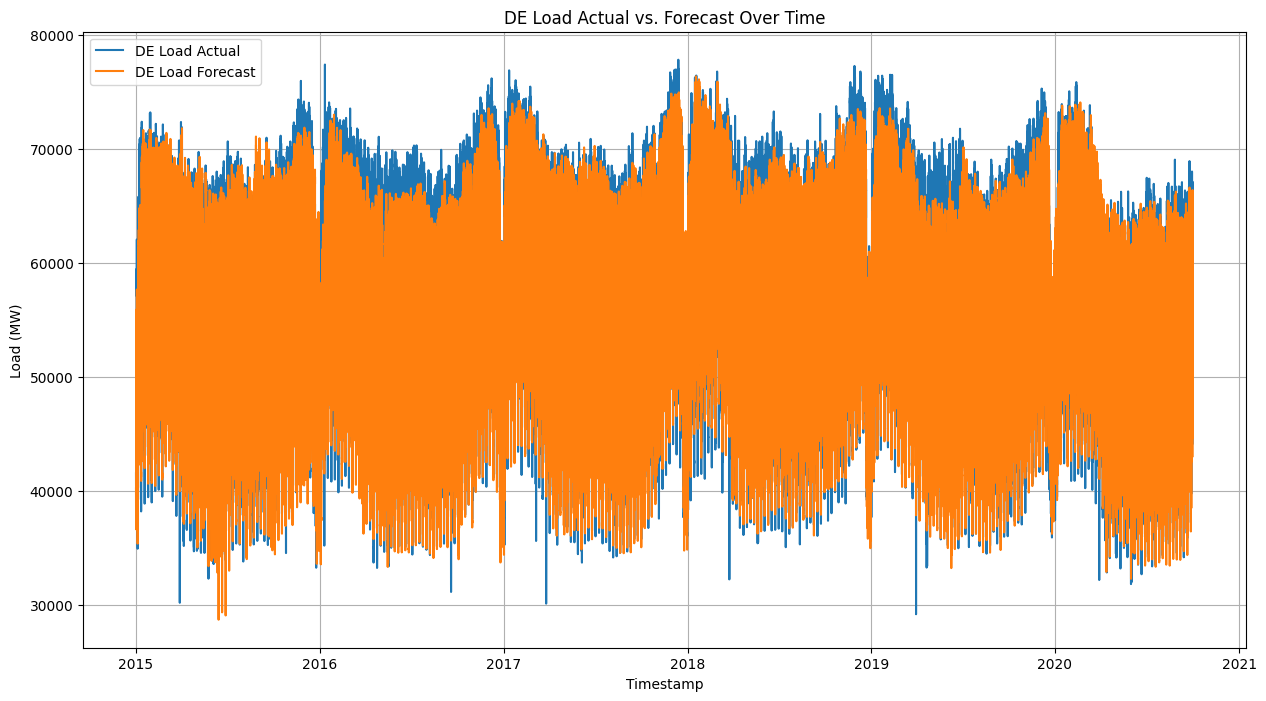

In [12]:
plt.figure(figsize=(15, 8))
plt.plot(df['utc_timestamp'], df['DE_load_actual_entsoe_transparency'], label='DE Load Actual')
plt.plot(df['utc_timestamp'], df['DE_load_forecast_entsoe_transparency'], label='DE Load Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Load (MW)')
plt.title('DE Load Actual vs. Forecast Over Time')
plt.legend()
plt.grid(True)
plt.show()

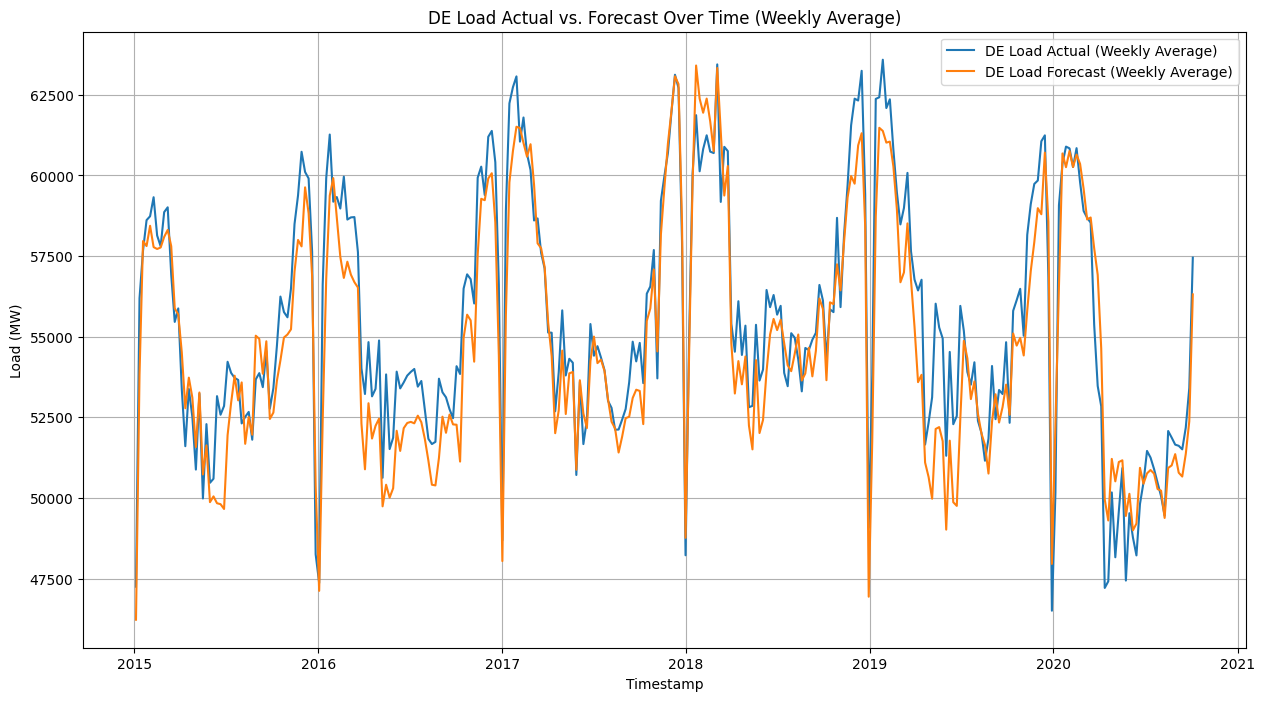

In [13]:
df_weekly = df.resample('W', on='utc_timestamp').mean()

plt.figure(figsize=(15, 8))
plt.plot(df_weekly.index, df_weekly['DE_load_actual_entsoe_transparency'], label='DE Load Actual (Weekly Average)')
plt.plot(df_weekly.index, df_weekly['DE_load_forecast_entsoe_transparency'], label='DE Load Forecast (Weekly Average)')
plt.xlabel('Timestamp')
plt.ylabel('Load (MW)')
plt.title('DE Load Actual vs. Forecast Over Time (Weekly Average)')
plt.legend()
plt.grid(True)
plt.show()

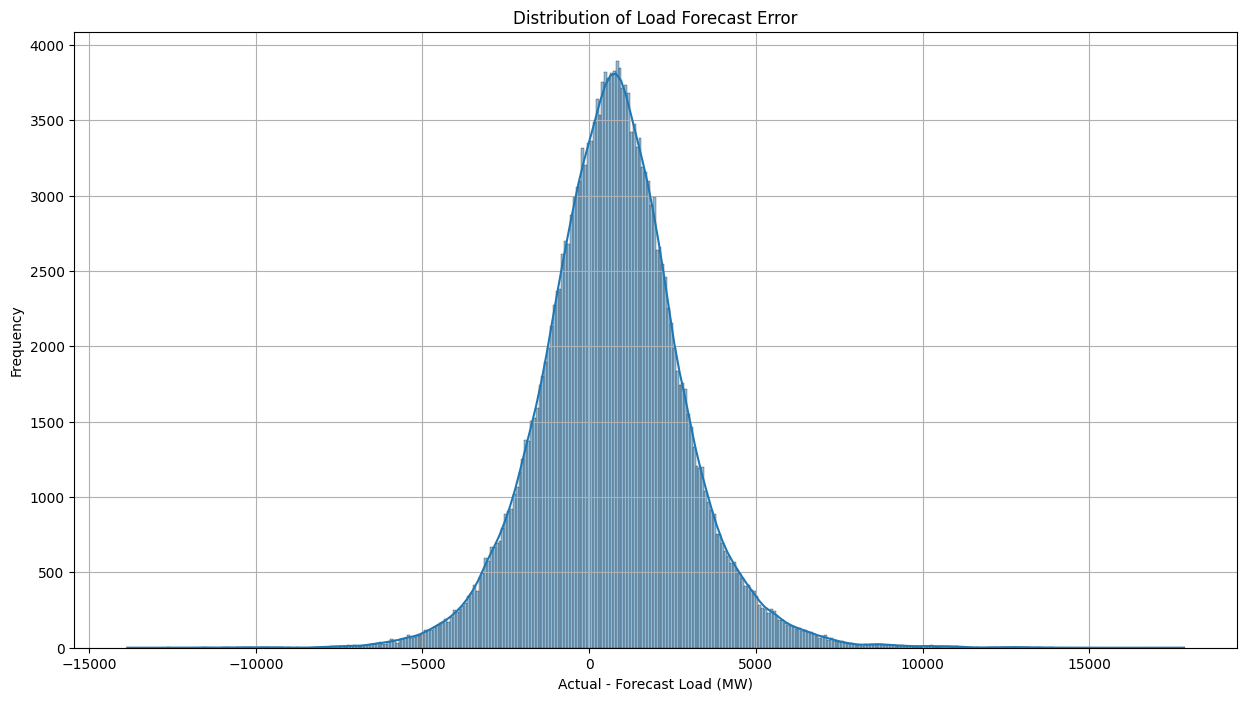

In [14]:
df['load_forecast_diff'] = df['DE_load_actual_entsoe_transparency'] - df['DE_load_forecast_entsoe_transparency']

plt.figure(figsize=(15, 8))
sns.histplot(df['load_forecast_diff'].dropna(), kde=True)
plt.xlabel('Actual - Forecast Load (MW)')
plt.ylabel('Frequency')
plt.title('Distribution of Load Forecast Error')
plt.grid(True)
plt.show()

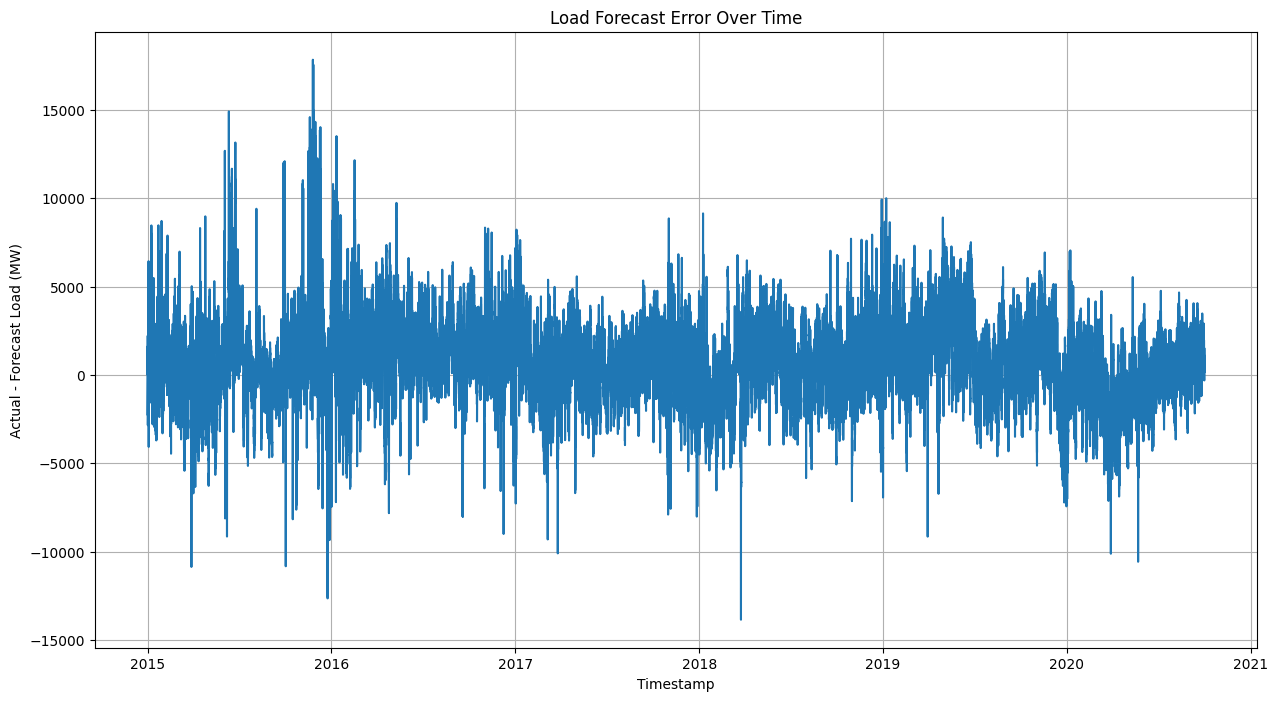

In [15]:
plt.figure(figsize=(15, 8))
plt.plot(df['utc_timestamp'], df['load_forecast_diff'])
plt.xlabel('Timestamp')
plt.ylabel('Actual - Forecast Load (MW)')
plt.title('Load Forecast Error Over Time')
plt.grid(True)
plt.show()

## Anomaly detection



In [16]:
generation_capacity_exceedance = df[
    (df['DE_solar_generation_actual'] > df['DE_solar_capacity']) |
    (df['DE_wind_generation_actual'] > df['DE_wind_capacity']) |
    (df['DE_wind_offshore_generation_actual'] > df['DE_wind_offshore_capacity']) |
    (df['DE_wind_onshore_generation_actual'] > df['DE_wind_onshore_capacity']) |
    (df['DE_solar_generation_actual'] < 0) |
    (df['DE_wind_generation_actual'] < 0) |
    (df['DE_wind_offshore_generation_actual'] < 0) |
    (df['DE_wind_onshore_generation_actual'] < 0) |
    (df['DE_load_actual_entsoe_transparency'] < 0) |
    (df['DE_load_forecast_entsoe_transparency'] < 0)
]

display(generation_capacity_exceedance)

,utc_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile,DE_50hertz_load_actual_entsoe_transparency,year,month,day,load_forecast_diff
795,2015-01-09 05:45:00+00:00,61334.33,55250.35,37260.0,0.0,0.0,27972.0,27585.44,0.9862,675.0,233.54,0.3460,27296.0,27351.90,1.0020,9080.22,2015,1,9,6083.98
796,2015-01-09 06:00:00+00:00,63280.19,57554.78,37260.0,0.0,0.0,27972.0,27762.61,0.9925,675.0,208.90,0.3095,27296.0,27553.71,1.0094,9519.41,2015,1,9,5725.41
797,2015-01-09 06:15:00+00:00,65143.32,60107.86,37260.0,0.0,0.0,27972.0,28067.30,1.0034,675.0,198.56,0.2942,27296.0,27868.74,1.0210,10003.50,2015,1,9,5035.46
798,2015-01-09 06:30:00+00:00,66327.31,60891.58,37260.0,0.0,0.0,27972.0,28290.36,1.0114,675.0,185.15,0.2743,27296.0,28105.21,1.0296,10251.90,2015,1,9,5435.73
799,2015-01-09 06:45:00+00:00,67469.68,61627.46,37260.0,0.0,0.0,27972.0,28288.61,1.0113,675.0,172.85,0.2561,27296.0,28115.76,1.0300,10579.60,2015,1,9,5842.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175172,2019-12-30 16:00:00+00:00,57720.63,60705.95,50508.0,0.0,0.0,50452.0,30645.82,0.6074,5742.0,5888.83,1.0256,44710.0,24756.99,0.5537,11943.30,2019,12,30,-2985.32
175173,2019-12-30 16:15:00+00:00,58340.33,60773.47,50508.0,0.0,0.0,50452.0,31033.00,0.6151,5742.0,5899.07,1.0274,44710.0,25133.93,0.5622,12101.50,2019,12,30,-2433.14
175174,2019-12-30 16:30:00+00:00,58514.81,61128.11,50508.0,0.0,0.0,50452.0,31407.54,0.6225,5742.0,5888.63,1.0255,44710.0,25518.91,0.5708,12147.10,2019,12,30,-2613.30
175175,2019-12-30 16:45:00+00:00,58512.89,61082.03,50508.0,0.0,0.0,50452.0,31827.37,0.6308,5742.0,5853.29,1.0194,44710.0,25974.08,0.5809,12004.70,2019,12,30,-2569.14


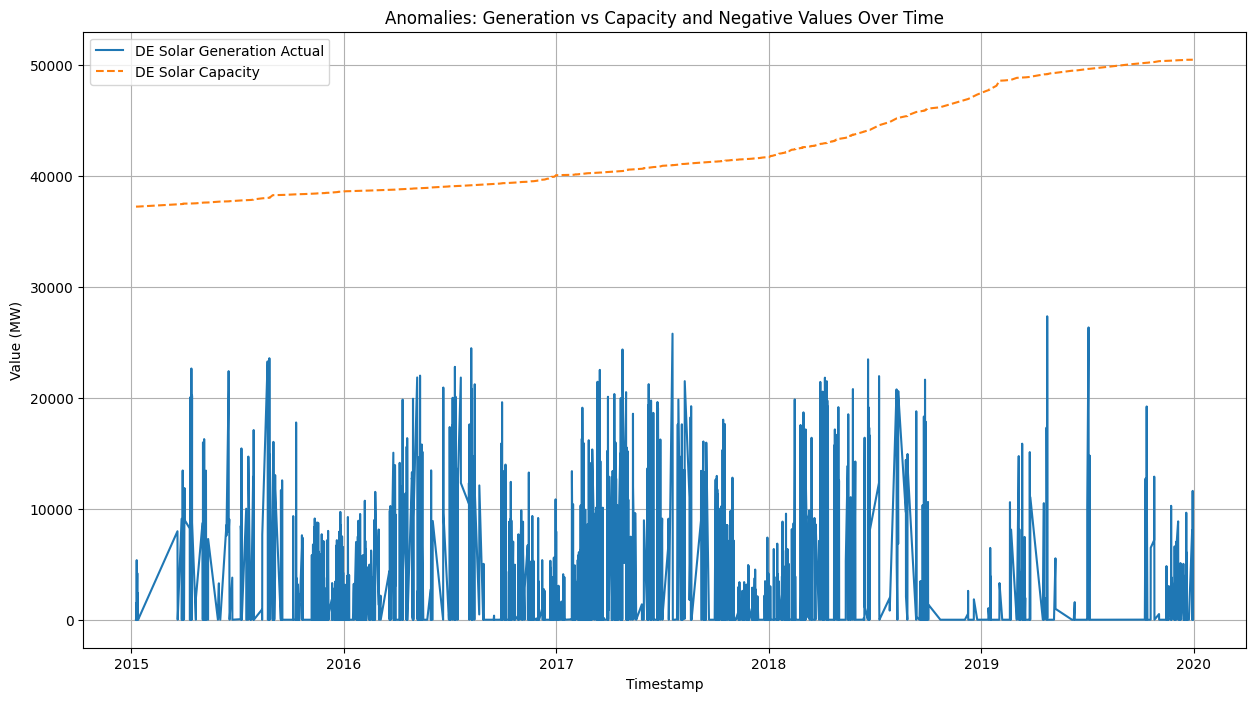

In [17]:
plt.figure(figsize=(15, 8))

# Plotting generation exceeding capacity or negative values for relevant columns
plt.plot(generation_capacity_exceedance['utc_timestamp'], generation_capacity_exceedance['DE_solar_generation_actual'], label='DE Solar Generation Actual')
plt.plot(generation_capacity_exceedance['utc_timestamp'], generation_capacity_exceedance['DE_solar_capacity'], label='DE Solar Capacity', linestyle='--')

plt.xlabel('Timestamp')
plt.ylabel('Value (MW)')
plt.title('Anomalies: Generation vs Capacity and Negative Values Over Time')
plt.legend()
plt.grid(True)
plt.show()

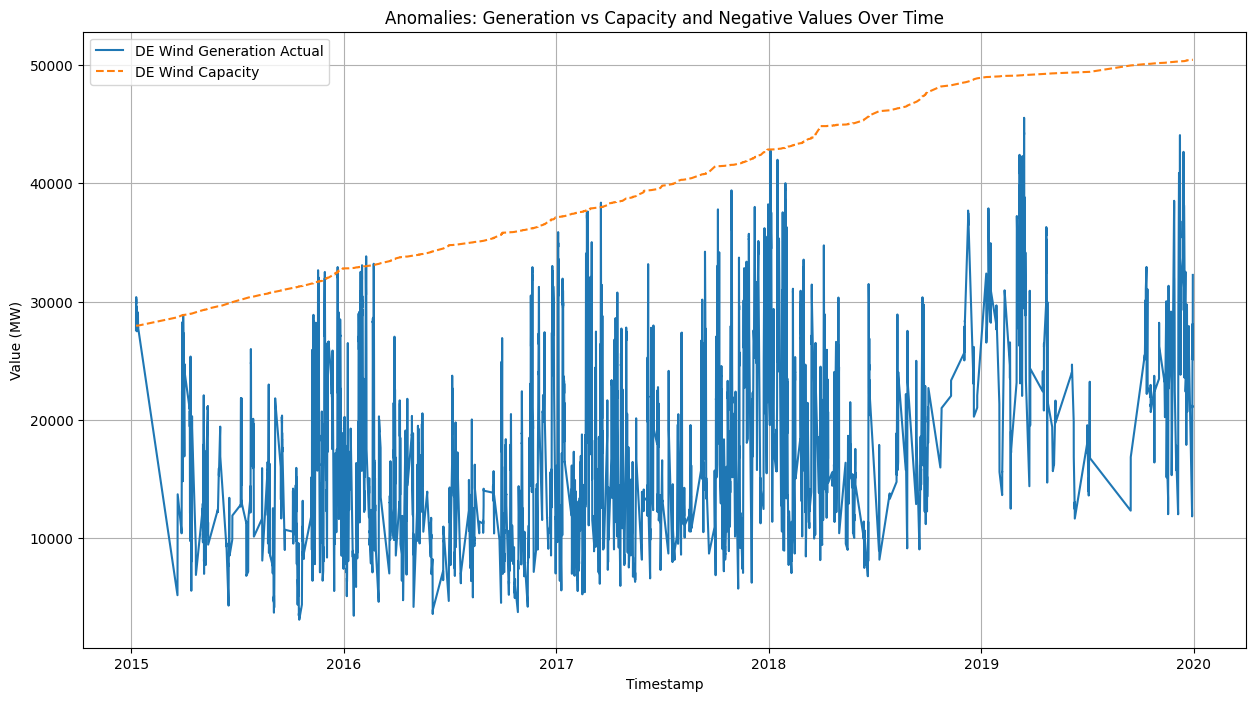

In [18]:
plt.figure(figsize=(15, 8))

# Plotting generation exceeding capacity or negative values for relevant columns
plt.plot(generation_capacity_exceedance['utc_timestamp'], generation_capacity_exceedance['DE_wind_generation_actual'], label='DE Wind Generation Actual')
plt.plot(generation_capacity_exceedance['utc_timestamp'], generation_capacity_exceedance['DE_wind_capacity'], label='DE Wind Capacity', linestyle='--')


plt.xlabel('Timestamp')
plt.ylabel('Value (MW)')
plt.title('Anomalies: Generation vs Capacity and Negative Values Over Time')
plt.legend()
plt.grid(True)
plt.show()

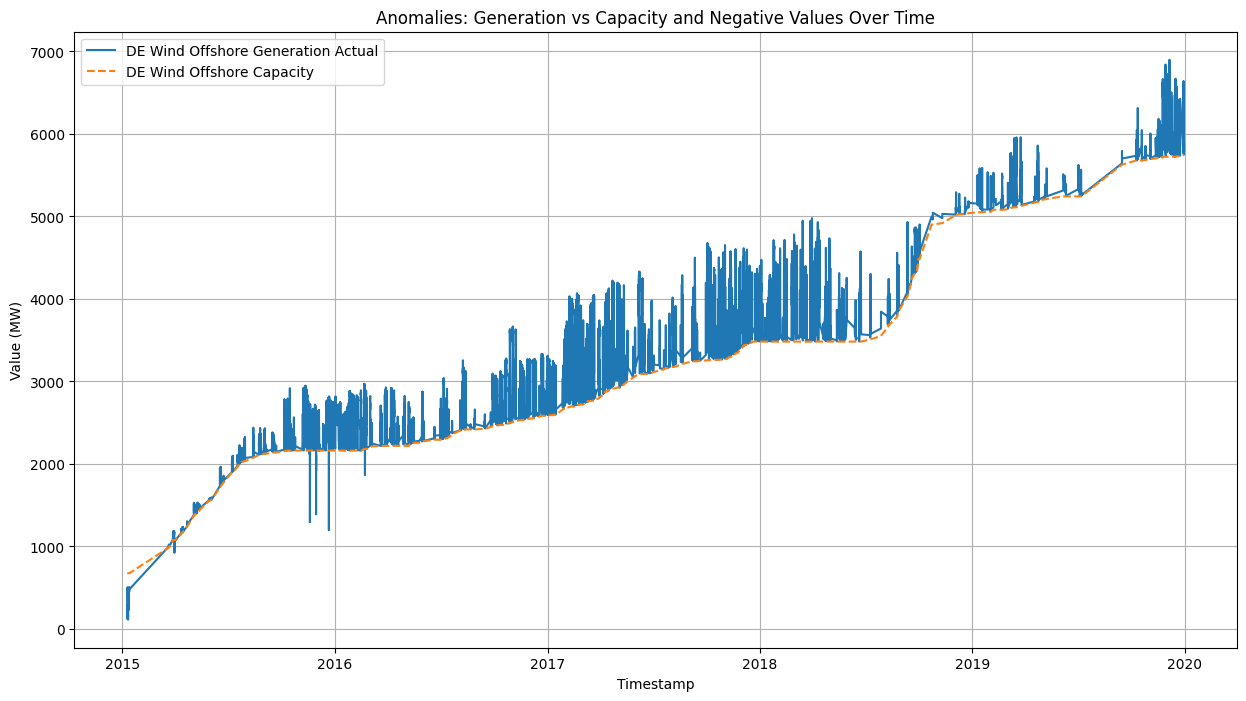

In [19]:
plt.figure(figsize=(15, 8))

# Plotting generation exceeding capacity or negative values for relevant columns
plt.plot(generation_capacity_exceedance['utc_timestamp'], generation_capacity_exceedance['DE_wind_offshore_generation_actual'], label='DE Wind Offshore Generation Actual')
plt.plot(generation_capacity_exceedance['utc_timestamp'], generation_capacity_exceedance['DE_wind_offshore_capacity'], label='DE Wind Offshore Capacity', linestyle='--')


plt.xlabel('Timestamp')
plt.ylabel('Value (MW)')
plt.title('Anomalies: Generation vs Capacity and Negative Values Over Time')
plt.legend()
plt.grid(True)
plt.show()

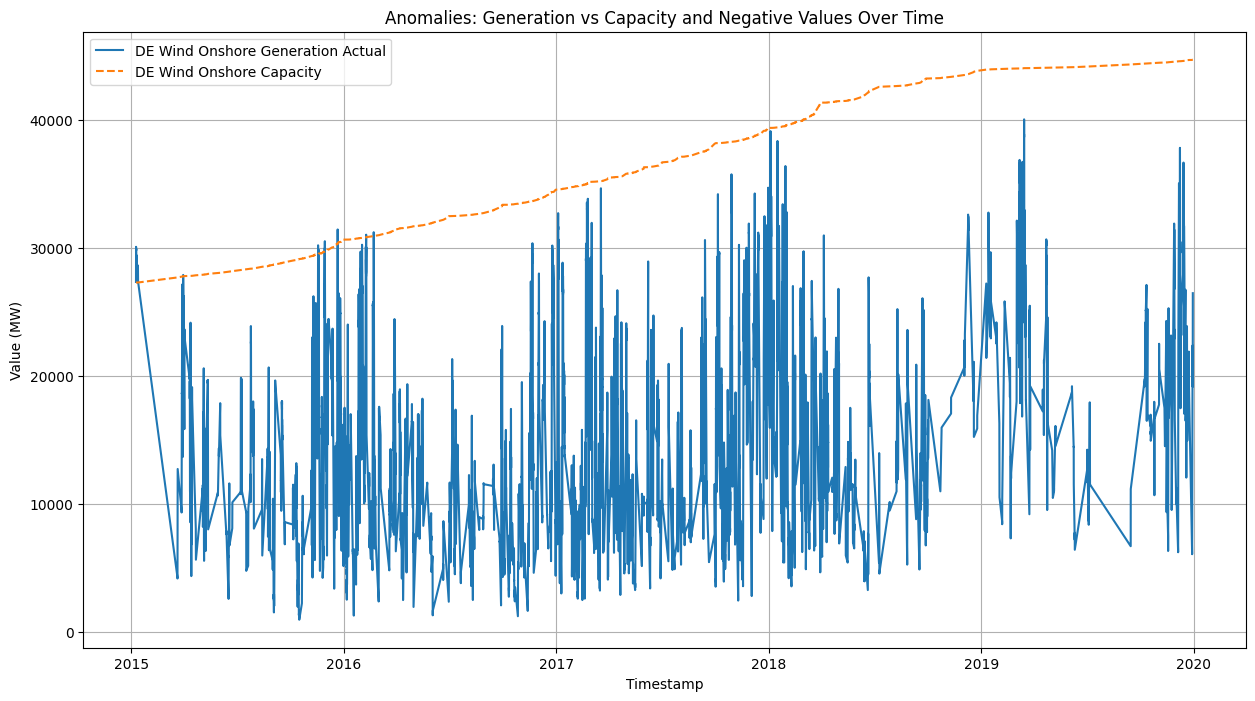

In [20]:
plt.figure(figsize=(15, 8))

# Plotting generation exceeding capacity or negative values for relevant columns
plt.plot(generation_capacity_exceedance['utc_timestamp'], generation_capacity_exceedance['DE_wind_onshore_generation_actual'], label='DE Wind Onshore Generation Actual')
plt.plot(generation_capacity_exceedance['utc_timestamp'], generation_capacity_exceedance['DE_wind_onshore_capacity'], label='DE Wind Onshore Capacity', linestyle='--')



plt.xlabel('Timestamp')
plt.ylabel('Value (MW)')
plt.title('Anomalies: Generation vs Capacity and Negative Values Over Time')
plt.legend()
plt.grid(True)
plt.show()

Looks like the distributions for wind on shore and wind generation are similar. Let us test  

In [21]:
# Check if DE_wind_onshore_generation_actual is equal to DE_wind_generation_actual
generation_diff = (df['DE_wind_onshore_generation_actual'] != df['DE_wind_generation_actual']).sum()
print(f"Number of rows where DE_wind_onshore_generation_actual is different from DE_wind_generation_actual: {generation_diff}")

# Check if DE_wind_onshore_capacity is equal to DE_wind_capacity
capacity_diff = (df['DE_wind_onshore_capacity'] != df['DE_wind_capacity']).sum()
print(f"Number of rows where DE_wind_onshore_capacity is different from DE_wind_capacity: {capacity_diff}")

Number of rows where DE_wind_onshore_generation_actual is different from DE_wind_generation_actual: 201541
Number of rows where DE_wind_onshore_capacity is different from DE_wind_capacity: 201604


## Data Imputation

In [22]:
# Apply forward fill imputation to the DataFrame
df_filled = df.fillna(method='ffill')

# Display the count of missing values after imputation to verify
print("Missing values after forward fill imputation:")
display(df_filled.isnull().sum())

Missing values after forward fill imputation:


/tmp/ipython-input-1839790436.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')


,0
utc_timestamp,0
DE_load_actual_entsoe_transparency,5
DE_load_forecast_entsoe_transparency,5
DE_solar_capacity,1
DE_solar_generation_actual,33
DE_solar_profile,33
DE_wind_capacity,1
DE_wind_generation_actual,5
DE_wind_profile,5
DE_wind_offshore_capacity,1


In [23]:
# Apply backward fill imputation to the DataFrame
df_filled = df_filled.fillna(method='bfill')

# Display the count of missing values after imputation to verify
print("Missing values after backward fill imputation:")
display(df_filled.isnull().sum())

Missing values after backward fill imputation:


/tmp/ipython-input-2644820393.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='bfill')


,0
utc_timestamp,0
DE_load_actual_entsoe_transparency,0
DE_load_forecast_entsoe_transparency,0
DE_solar_capacity,0
DE_solar_generation_actual,0
DE_solar_profile,0
DE_wind_capacity,0
DE_wind_generation_actual,0
DE_wind_profile,0
DE_wind_offshore_capacity,0


## EDA


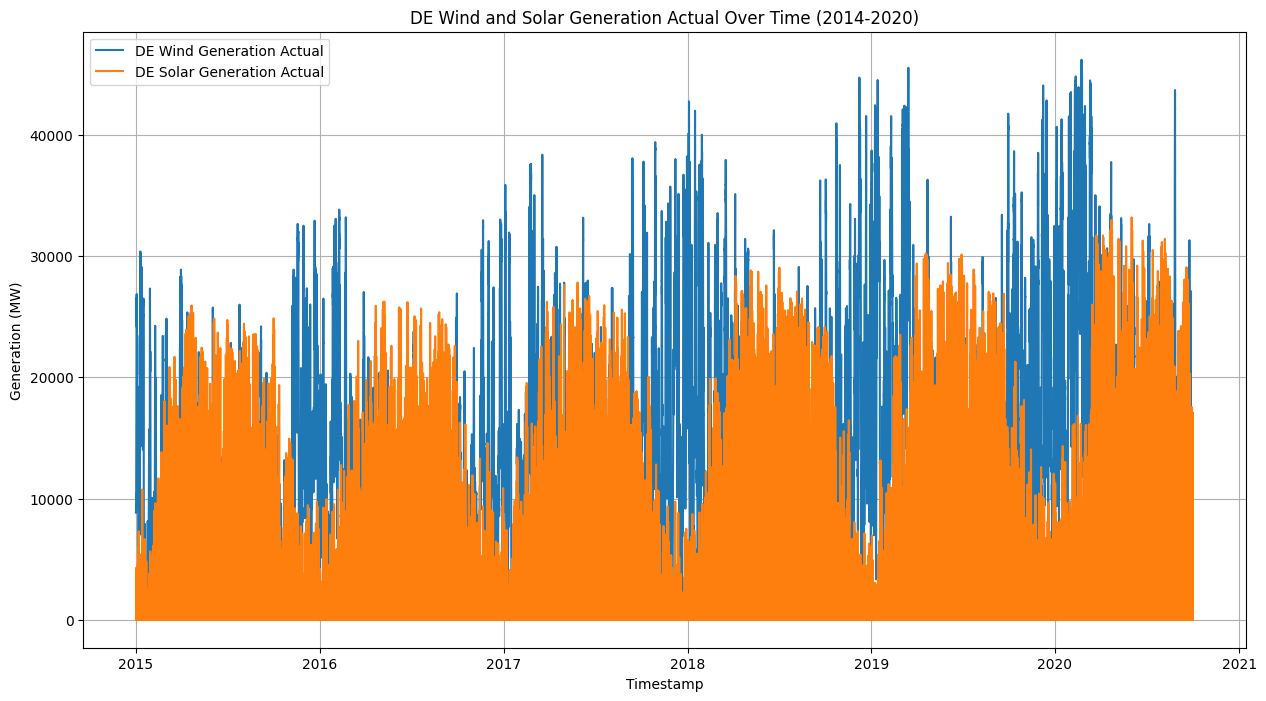

In [24]:
plt.figure(figsize=(15, 8))

plt.plot(df_filled['utc_timestamp'], df_filled['DE_wind_generation_actual'], label='DE Wind Generation Actual')
plt.plot(df_filled['utc_timestamp'], df_filled['DE_solar_generation_actual'], label='DE Solar Generation Actual')

plt.xlabel('Timestamp')
plt.ylabel('Generation (MW)')
plt.title('DE Wind and Solar Generation Actual Over Time (2014-2020)')
plt.legend()
plt.grid(True)
plt.show()

## Diurnal & seasonal heatmaps



In [25]:
df_filled['hour'] = df_filled['utc_timestamp'].dt.hour
df_filled['dayofyear'] = df_filled['utc_timestamp'].dt.dayofyear

solar_heatmap_data = df_filled.pivot_table(values='DE_solar_generation_actual', index='hour', columns='dayofyear', aggfunc='mean')
wind_heatmap_data = df_filled.pivot_table(values='DE_wind_generation_actual', index='hour', columns='dayofyear', aggfunc='mean')

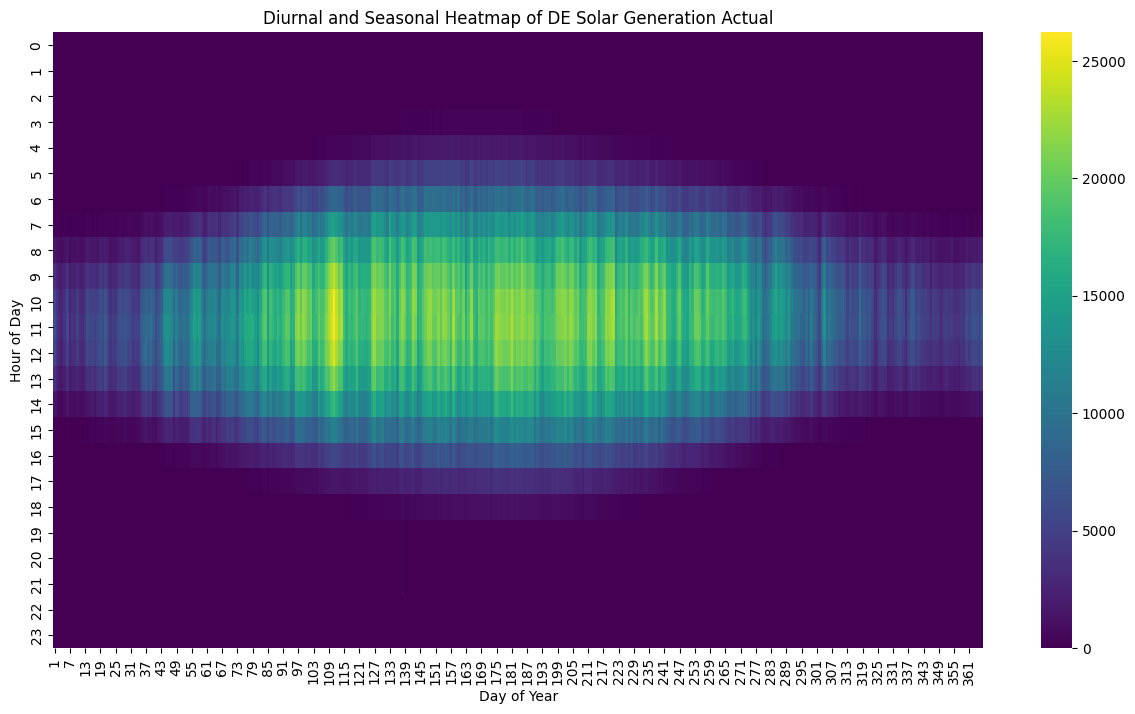

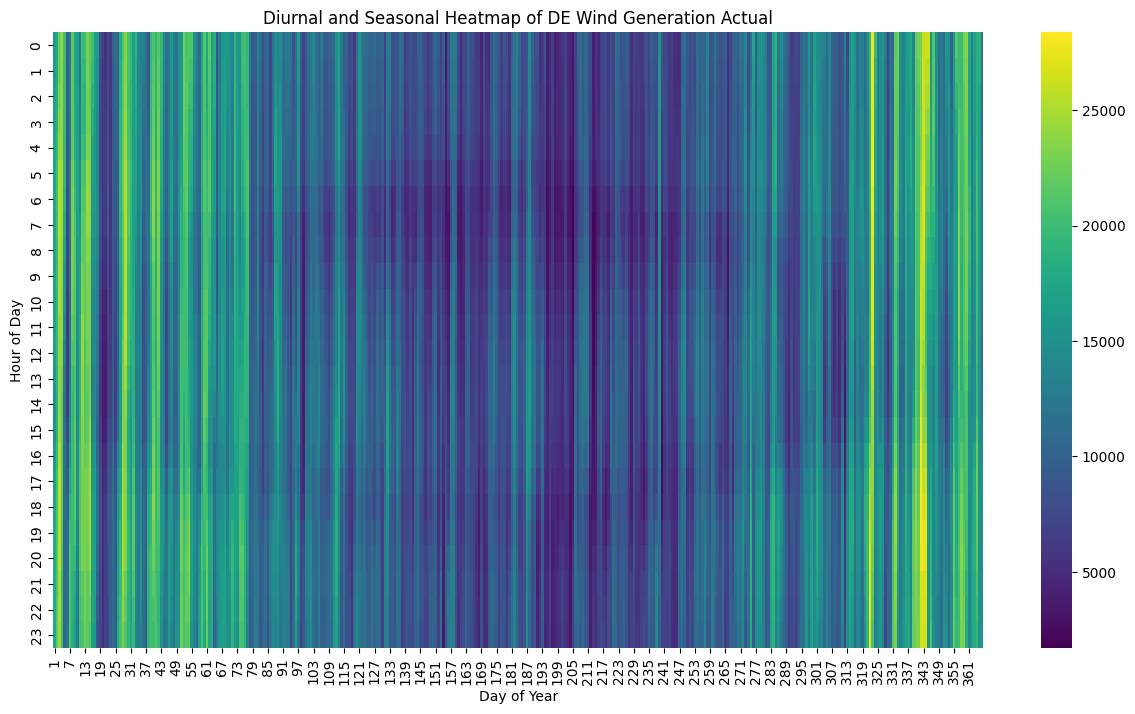

In [26]:
plt.figure(figsize=(15, 8))
sns.heatmap(solar_heatmap_data, cmap='viridis')
plt.title('Diurnal and Seasonal Heatmap of DE Solar Generation Actual')
plt.xlabel('Day of Year')
plt.ylabel('Hour of Day')
plt.show()

plt.figure(figsize=(15, 8))
sns.heatmap(wind_heatmap_data, cmap='viridis')
plt.title('Diurnal and Seasonal Heatmap of DE Wind Generation Actual')
plt.xlabel('Day of Year')
plt.ylabel('Hour of Day')
plt.show()

* We can observe a strong Diurnal cycle. Solar generation is near-zero during the night (hours 20 to 6) and peaks significantly during daylight hours, typically between 10 am and 5 pm.
* Generation is much higher during the summer months (approximately Day 120 to Day 270) due to longer daylight hours and more intense sunshine. Conversely, production is significantly lower during winter (around Day 300 to Day 60).
* The highest generation levels (indicated by bright yellow/white areas) occur in late spring and summer during the middle of the day. July is often the month with the highest solar power generation in Germany.
* The most significant observation is that wind generation is considerably higher during the winter months (Days 1-60 and Day 300 onwards) than in the summer months (approximately Day 120 to Day 270). This pattern is typical for wind energy, as stronger and more consistent wind speeds are common in winter due to greater temperature differences and more frequent low-pressure systems.
* Unlike solar power, which has a distinct day/night cycle, wind generation does not follow a strict hourly pattern. The production levels vary throughout the day and night based purely on wind availability.
* The highly variable nature of wind energy is evident from the fluctuating color intensity across the heatmap. The output can change dramatically from one day to the next and even within a single day, regardless of the time.



## Capacity factor distributions and ramp analysis


Calculate and visualize the distribution of capacity factors for wind and solar power, and analyze ramp rates (changes in generation over time).


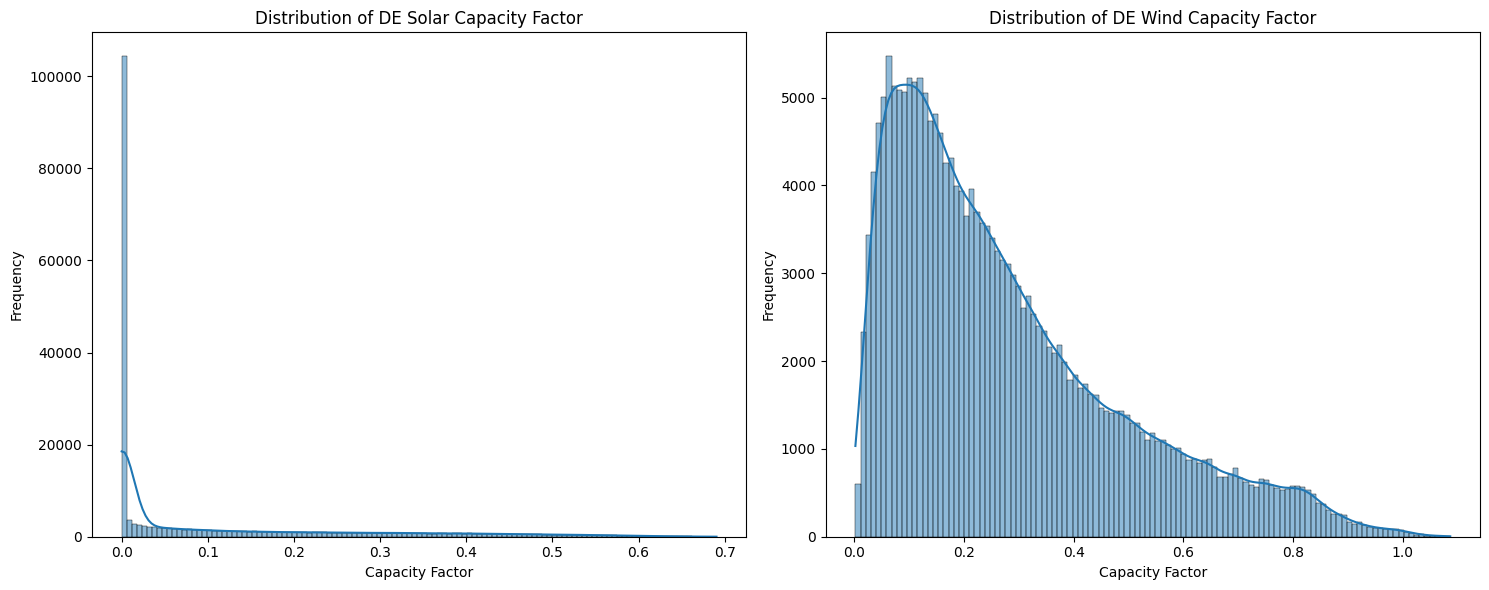

In [27]:
df_filled['DE_solar_capacity_factor'] = df_filled['DE_solar_generation_actual'] / df_filled['DE_solar_capacity']
df_filled['DE_wind_capacity_factor'] = df_filled['DE_wind_generation_actual'] / df_filled['DE_wind_capacity']

# Replace infinite values with NaN before plotting
df_filled.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_filled['DE_solar_capacity_factor'].dropna(), kde=True)
plt.title('Distribution of DE Solar Capacity Factor')
plt.xlabel('Capacity Factor')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_filled['DE_wind_capacity_factor'].dropna(), kde=True)
plt.title('Distribution of DE Wind Capacity Factor')
plt.xlabel('Capacity Factor')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Solar Capacity Factor**
* The tall bar near the y-axis (frequency of over 100,000 instances) indicates that solar power plants in Germany operate at a low percentage of their maximum capacity for a majority of the time. This is primarily due to the obvious diurnal cycle (no sun at night) and seasonal variations (less sun in winter).
* The distribution suggests a relatively low average capacity factor, generally estimated in the range of 24-26% in many regions, including Germany where the solar resource quality is considered average.
* This variability means solar energy output needs to be complemented by energy storage or other sources to ensure a consistent power supply when the sun is not shining.

**Wind Capacity Factor**
* The frequency is distributed more evenly across a wider range of capacity factors compared to solar. This indicates that while periods of low wind do occur, wind turbines also frequently operate at a significant fraction of their full capacity.
* Wind power plants, particularly offshore wind turbines, often have higher average capacity factors than solar plants, typically ranging from 32-35% on average.
* Wind power is a major source of electricity in Germany, providing a substantial and more continuous, though still intermittent, contribution to the grid than solar power alone.

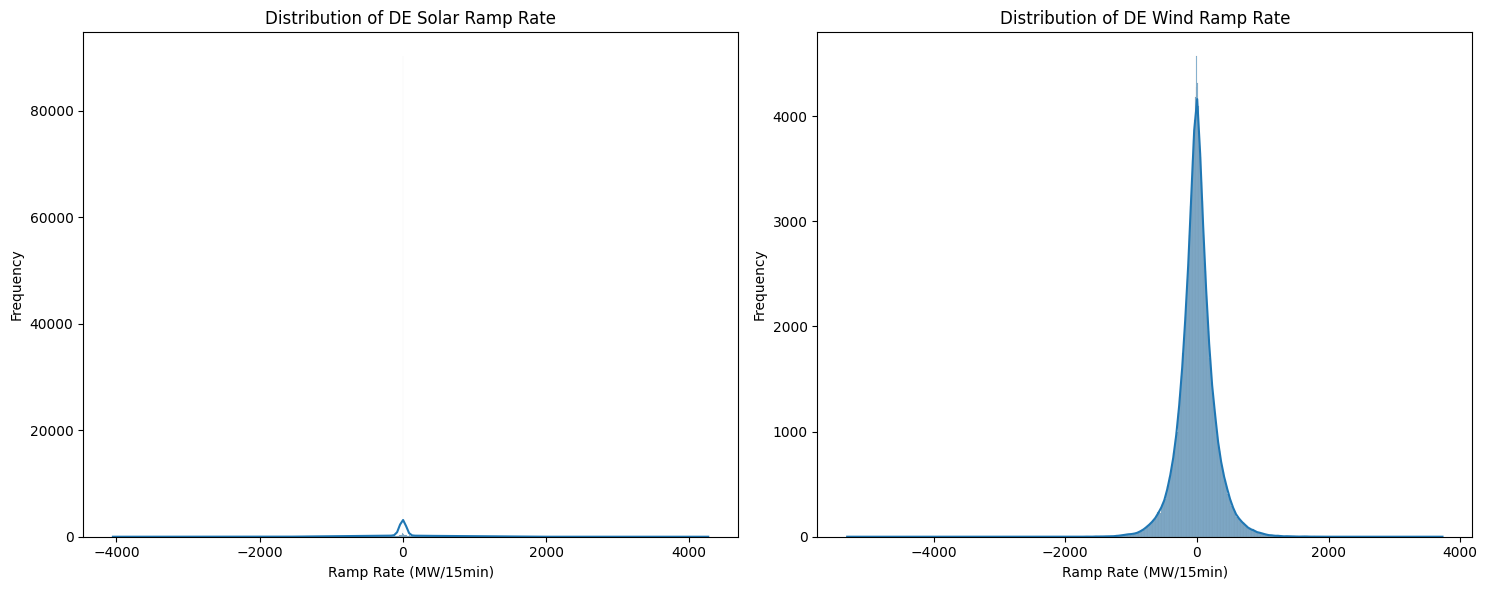

In [28]:
df_filled['DE_solar_ramp_rate'] = df_filled['DE_solar_generation_actual'].diff()
df_filled['DE_wind_ramp_rate'] = df_filled['DE_wind_generation_actual'].diff()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_filled['DE_solar_ramp_rate'].dropna(), kde=True)
plt.title('Distribution of DE Solar Ramp Rate')
plt.xlabel('Ramp Rate (MW/15min)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_filled['DE_wind_ramp_rate'].dropna(), kde=True)
plt.title('Distribution of DE Wind Ramp Rate')
plt.xlabel('Ramp Rate (MW/15min)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Solar Ramp Rate**
* The vast majority of solar power changes occur gradually. The sun's movement is predictable, meaning large, sudden changes in total grid-wide solar output over a 15-minute interval are rare under normal conditions.
* The small peaks (both positive and negative) likely correspond to local, fast-moving cloud cover events, which can cause sudden, significant drops or increases in generation for specific regions, but usually not at a massive, system-wide scale simultaneously.

**Wind Ramp Rate**
* This distribution indicates that wind power experiences much more frequent and substantial rapid changes in output compared to solar power.
* Wind speeds and directions are inherently more variable and less predictable in the short term than solar irradiance, leading to rapid power fluctuations that require active management from grid operators.
* The wide spread of ramp rates highlights the challenge of integrating large amounts of wind energy into the grid, as backup or balancing power (e.g., energy storage or other flexible power plants) must be available to manage these frequent and large fluctuations.

The graphs demonstrate that solar power changes more slowly and predictably in aggregate at a 15-minute interval, while wind power is inherently more volatile and subject to frequent, rapid changes in both directions. This difference highlights the complementary nature of the two energy sources and the ongoing need for advanced grid management and storage solutions in Germany's energy transition.
